In [5]:
# Dependencies and Setup
import pandas as pd

In [6]:
# File to Load
upto44_data = "Resources/Underlying cause of Death 2019 to 2020 by Age group 1 - 44yrs.csv"
middleaged_data = "Resources/Underlying cause of Death 2019 to 2020 by Age group 45 to 64 yrs.csv"
senior_data = "Resources/Underlying cause of Death 2019 to 2020 by Age group 65 and plus.csv"

# Read School and Student Data File and store into Pandas DataFrames
upto44_data_df = pd.read_csv(upto44_data)
middleaged_data_df = pd.read_csv(middleaged_data)
senior_data_df = pd.read_csv(senior_data)

In [7]:
# Combine the data into a single dataset. 
complete_agegrouped_df = pd.concat([upto44_data_df, middleaged_data_df, senior_data_df])
# Saving a raw version of the complete data before cleaning
complete_agegrouped_df.to_csv('Aida Output Data/Complete 2019 to 2020 Age grouped cancer death data.csv')
complete_agegrouped_df.head()

,Notes,State,State Code,Year,Year Code,Cause of death,Cause of death Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,2019.0,2019.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44 years,35-44,19.0,593306.0,Unreliable
1,NaN,Alabama,1.0,2019.0,2019.0,"Bronchus or lung, unspecified - Malignant neop...",C34.9,35-44 years,35-44,16.0,593306.0,Unreliable
2,NaN,Alabama,1.0,2019.0,2019.0,"Breast, unspecified - Malignant neoplasms",C50.9,35-44 years,35-44,22.0,593306.0,3.7
3,NaN,Alabama,1.0,2020.0,2020.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44 years,35-44,16.0,596362.0,Unreliable
4,NaN,Alabama,1.0,2020.0,2020.0,"Pancreas, unspecified - Malignant neoplasms",C25.9,35-44 years,35-44,10.0,596362.0,Unreliable


In [8]:
complete_agegrouped_df.columns

Index(['Notes', 'State', 'State Code', 'Year', 'Year Code', 'Cause of death',
       'Cause of death Code', 'Ten-Year Age Groups',
       'Ten-Year Age Groups Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

In [9]:
#cleaning up the complete age grouped dataframe, by dropping some columns, and extracting the 2020 data which is the year we are interested in, and setting the index
clean_agegrouped_df = complete_agegrouped_df.drop(['Notes', 'State Code', 'Year Code', 'Ten-Year Age Groups'], axis=1)
clean_agegrouped_df.head()

,State,Year,Cause of death,Cause of death Code,Ten-Year Age Groups Code,Deaths,Population,Crude Rate
0,Alabama,2019.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44,19.0,593306.0,Unreliable
1,Alabama,2019.0,"Bronchus or lung, unspecified - Malignant neop...",C34.9,35-44,16.0,593306.0,Unreliable
2,Alabama,2019.0,"Breast, unspecified - Malignant neoplasms",C50.9,35-44,22.0,593306.0,3.7
3,Alabama,2020.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44,16.0,596362.0,Unreliable
4,Alabama,2020.0,"Pancreas, unspecified - Malignant neoplasms",C25.9,35-44,10.0,596362.0,Unreliable


In [10]:
# Renaming the age column
rename_df = clean_agegrouped_df.rename(columns = {'Ten-Year Age Groups Code':'Age Groups'})
rename_df.head()

,State,Year,Cause of death,Cause of death Code,Age Groups,Deaths,Population,Crude Rate
0,Alabama,2019.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44,19.0,593306.0,Unreliable
1,Alabama,2019.0,"Bronchus or lung, unspecified - Malignant neop...",C34.9,35-44,16.0,593306.0,Unreliable
2,Alabama,2019.0,"Breast, unspecified - Malignant neoplasms",C50.9,35-44,22.0,593306.0,3.7
3,Alabama,2020.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44,16.0,596362.0,Unreliable
4,Alabama,2020.0,"Pancreas, unspecified - Malignant neoplasms",C25.9,35-44,10.0,596362.0,Unreliable


In [11]:
# Extracting the 2020 data
agegrouped_2020_df = rename_df.loc[rename_df['Year'] == 2020.0]
agegrouped_2020_df.head()


,State,Year,Cause of death,Cause of death Code,Age Groups,Deaths,Population,Crude Rate
3,Alabama,2020.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44,16.0,596362.0,Unreliable
4,Alabama,2020.0,"Pancreas, unspecified - Malignant neoplasms",C25.9,35-44,10.0,596362.0,Unreliable
5,Alabama,2020.0,"Bronchus or lung, unspecified - Malignant neop...",C34.9,35-44,11.0,596362.0,Unreliable
6,Alabama,2020.0,"Malignant melanoma of skin, unspecified - Mali...",C43.9,35-44,12.0,596362.0,Unreliable
7,Alabama,2020.0,"Breast, unspecified - Malignant neoplasms",C50.9,35-44,26.0,596362.0,4.4


In [12]:
# Checking the unique Age groups counts
agegrouped_2020_df['Age Groups'].value_counts()

65-74     1858
75-84     1800
85+       1396
55-64     1394
45-54      664
35-44      252
25-34       60
15-24       13
14-May       8
4-Jan        1
Name: Age Groups, dtype: int64

In [13]:
# Dropping the Age groups that are non numerical '14-May' and '4-Jan'
new_df = agegrouped_2020_df.drop(agegrouped_2020_df[agegrouped_2020_df['Age Groups'] == '14-May'].index)
clean_agegrouped_2020_df =new_df.drop(new_df[new_df['Age Groups'] == '4-Jan'].index)
clean_agegrouped_2020_df.head()

,State,Year,Cause of death,Cause of death Code,Age Groups,Deaths,Population,Crude Rate
3,Alabama,2020.0,"Colon, unspecified - Malignant neoplasms",C18.9,35-44,16.0,596362.0,Unreliable
4,Alabama,2020.0,"Pancreas, unspecified - Malignant neoplasms",C25.9,35-44,10.0,596362.0,Unreliable
5,Alabama,2020.0,"Bronchus or lung, unspecified - Malignant neop...",C34.9,35-44,11.0,596362.0,Unreliable
6,Alabama,2020.0,"Malignant melanoma of skin, unspecified - Mali...",C43.9,35-44,12.0,596362.0,Unreliable
7,Alabama,2020.0,"Breast, unspecified - Malignant neoplasms",C50.9,35-44,26.0,596362.0,4.4


In [14]:

clean_agegrouped_2020_df['Age Groups'].value_counts()

65-74    1854
75-84    1799
55-64    1393
85+      1393
45-54     662
35-44     252
25-34      60
15-24      13
Name: Age Groups, dtype: int64

In [15]:
group_clean_agegrouped_2020_df = clean_agegrouped_2020_df.groupby(['Age Groups']).sum()['Deaths']
group_clean_agegrouped_2020_df

Age Groups
15-24       199.0
25-34      1008.0
35-44      6301.0
45-54     27258.0
55-64     99458.0
65-74    164081.0
75-84    153192.0
85+       93970.0
Name: Deaths, dtype: float64

In [16]:
age_group_counts = pd.DataFrame(group_clean_agegrouped_2020_df)
age_group_counts

,Deaths
Age Groups,
15-24,199.0
25-34,1008.0
35-44,6301.0
45-54,27258.0
55-64,99458.0
65-74,164081.0
75-84,153192.0
85+,93970.0


<AxesSubplot:title={'center':'Cancer mortality by age groups'}, xlabel='Age Groups', ylabel='Death Counts'>

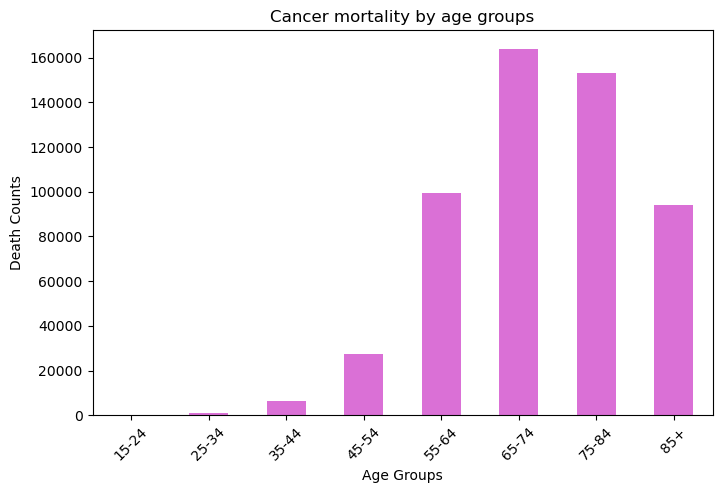

In [17]:
#Plotting a bar graph of the total death counts vs age groups
fig1 = age_group_counts.plot(kind='bar', xlabel='Age Groups', ylabel='Death Counts', title='Cancer mortality by age groups', figsize=[8,5], color='orchid', rot=45, legend=False)
fig1.figure.savefig('Aida Output Data/Age_groups_cancer_mortality.png')
fig1
